In [1]:
class Node(object):
    def __init__(self, n=1, x=0, y=0, z=0):
        self.position = [int(x),int(y),int(z)]
        self.birthday = n
        self.parent = None
        self.children = []
    
    def setBirthday(self,n):
        self.birthday = n
        
    def getBirthday(self):
        return self.birthday
    
    def setParent(self, parent):
        self.parent = parent
    
    def getParent(self):
        return self.parent
    
    def addChild(self, child):
        self.children.append(child)
        child.setParent(self)
    
    def getChildren(self):
        return self.children
    
    def setPosition(self, x,y,z):
        self.position = [x,y,z]
        
    def getPosition(self):
        return self.position
    
    def equals(self, node):
        return (self.position == node.position)
    
    def preBirth(self):
        n = self.birthday
        x = self.position[0]
        y = self.position[1]
        z = self.position[2]
        
        A = Node(n+1, x+1, y+1, z+(-1)**x)
        B = Node(n+1, x-1, y-1, z+(-1)**x)
        C = Node(n+1, x+1, y-1, z+(-1)**(x+1))
        D = Node(n+1, x-1, y+1, z+(-1)**(x+1))
        return [A,B,C,D]

In [2]:
class TreeClass(object):
    def __init__(self):
        self.data = []
        self.population = 0
    
    def append(self,a):
        self.population += len(a)
        self.data.append(a)
        
    def getData(self):
        
        return self.data
        
    def getDepth(self):
        return len(self.data)
    
    def getLastBranch(self):
        return self.data[self.getDepth()-1]
    
    def getPopulation(self):
        return self.population
        
    def printData(self):
        print("Total population: ",self.getPopulation())
        for level in self.data:
            for node in level:
                pos = node.getPosition()
                print("n: ",node.getBirthday()," pos:(",pos[0],", ",pos[1],", ",pos[2],")")

In [3]:
def BloomBF(Tree):
    preNodes = []
    newNodes = []
    for node in Tree.getLastBranch():
        preNodes.extend(node.preBirth())
    
    for i in range(len(preNodes)):
        repeated = False
        for branchLevel in Tree.getData():
            for node in branchLevel:
                if preNodes[i].equals(node):
                    repeated = True
        for j in range(len(preNodes)):
            if i != j and preNodes[i].equals(preNodes[j]):
                repeated = True
        if repeated == False:
            newNodes.append(preNodes[i])
    
    Tree.append(newNodes)
    return Tree

In [12]:
Tree = TreeClass()
root = Node()
Tree.append([root])
Tree.printData()

Total population:  1
n:  1  pos:( 0 ,  0 ,  0 )


In [13]:
n = 30
bbs = [Tree.getPopulation()] # Baby Breath Sequence
for i in range(n-1):
    Tree = BloomBF(Tree)
    bbs.append(Tree.getPopulation())

In [8]:
import numpy as np
import matplotlib.pyplot as plt

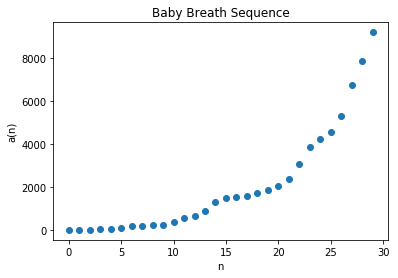

In [14]:
x = np.array(range(len(bbs)))
y = np.array(bbs)
plt.scatter(x, y)
plt.title('Baby Breath Sequence')
plt.xlabel('n')
plt.ylabel('a(n)')
plt.show()

In [15]:
print("Baby Breath Sequence: ",bbs)

Baby Breath Sequence:  [1, 5, 17, 29, 41, 77, 161, 197, 209, 245, 353, 533, 665, 869, 1313, 1469, 1529, 1589, 1697, 1877, 2033, 2357, 3089, 3869, 4241, 4565, 5321, 6749, 7865, 9197]


In [16]:
Tree.getData()[2][2].getPosition()

[0, 2, 2]

In [22]:
l_bbs = np.log(bbs)
l_bbs

array([0.        , 1.60943791, 2.83321334, 3.36729583, 3.71357207,
       4.34380542, 5.08140436, 5.28320373, 5.34233425, 5.50125821,
       5.86646806, 6.27852142, 6.49978704, 6.76734313, 7.18006987,
       7.29233718, 7.33236921, 7.37086017, 7.43661727, 7.53743004,
       7.61726781, 7.7651449 , 8.03560269, 8.26075135, 8.35255437,
       8.42617379, 8.57941653, 8.81714962, 8.97017782, 9.12663262])

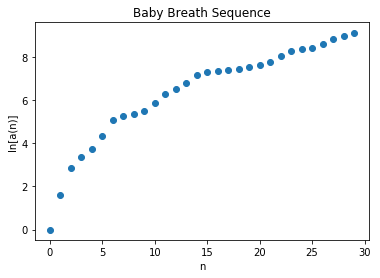

In [21]:
x = np.array(range(len(l_bbs)))
y = np.array(l_bbs)
plt.scatter(x, y)
plt.title('Baby Breath Sequence')
plt.xlabel('n')
plt.ylabel('ln[a(n)]')
plt.show()

In [25]:
inv_bbs = np.divide(1,bbs)
inv_bbs

array([1.00000000e+00, 2.00000000e-01, 5.88235294e-02, 3.44827586e-02,
       2.43902439e-02, 1.29870130e-02, 6.21118012e-03, 5.07614213e-03,
       4.78468900e-03, 4.08163265e-03, 2.83286119e-03, 1.87617261e-03,
       1.50375940e-03, 1.15074799e-03, 7.61614623e-04, 6.80735194e-04,
       6.54022237e-04, 6.29326621e-04, 5.89275192e-04, 5.32765051e-04,
       4.91883915e-04, 4.24268137e-04, 3.23729362e-04, 2.58464720e-04,
       2.35793445e-04, 2.19058050e-04, 1.87934599e-04, 1.48170099e-04,
       1.27145582e-04, 1.08731108e-04])

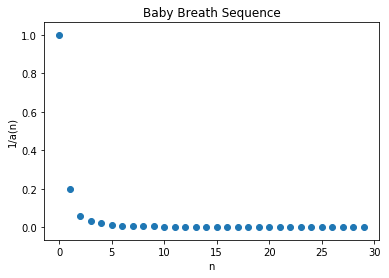

In [27]:
x = np.array(range(len(inv_bbs)))
y = np.array(inv_bbs)
plt.scatter(x, y)
plt.title('Baby Breath Sequence')
plt.xlabel('n')
plt.ylabel('1/a(n)')
plt.show()